In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df =pd.read_csv('/content/gdrive/My Drive/30%_new data/Plasma2021_severe.csv')

df

,Protein IDs,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
0,NaN,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe
1,P62851,0,0,0,0,0,0,0,8428200,0,0,0,0,0,1648100
2,P22392,0,0,0,0,0,7417500,0,0,0,0,0,0,0,0
3,O60869,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Q9H0K6,31293000,5962900,0,28968000,0,0,0,0,4827200,2757000,6877600,3570500,2625500,2228600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Q92752,0,0,1669500,0,0,6870300,0,42891000,0,0,2493800,0,0,0
1305,Q99798,0,0,0,0,0,42094000,0,137300000,268910,0,0,0,663850,94957
1306,Q9BUF5,0,10182000,0,0,22914000,126670000,1176500,466240000,0,0,0,10847000,8834400,0
1307,Q9BVA1,0,0,0,0,0,139790000,0,382310000,541620,209740,0,0,504670,130100


In [4]:
df.replace('0', np.nan, inplace=True)
df

,Protein IDs,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
0,NaN,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe
1,P62851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8428200,NaN,NaN,NaN,NaN,NaN,1648100
2,P22392,NaN,NaN,NaN,NaN,NaN,7417500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O60869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q9H0K6,31293000,5962900,NaN,28968000,NaN,NaN,NaN,NaN,4827200,2757000,6877600,3570500,2625500,2228600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Q92752,NaN,NaN,1669500,NaN,NaN,6870300,NaN,42891000,NaN,NaN,2493800,NaN,NaN,NaN
1305,Q99798,NaN,NaN,NaN,NaN,NaN,42094000,NaN,137300000,268910,NaN,NaN,NaN,663850,94957
1306,Q9BUF5,NaN,10182000,NaN,NaN,22914000,126670000,1176500,466240000,NaN,NaN,NaN,10847000,8834400,NaN
1307,Q9BVA1,NaN,NaN,NaN,NaN,NaN,139790000,NaN,382310000,541620,209740,NaN,NaN,504670,130100


<BarContainer object of 14 artists>

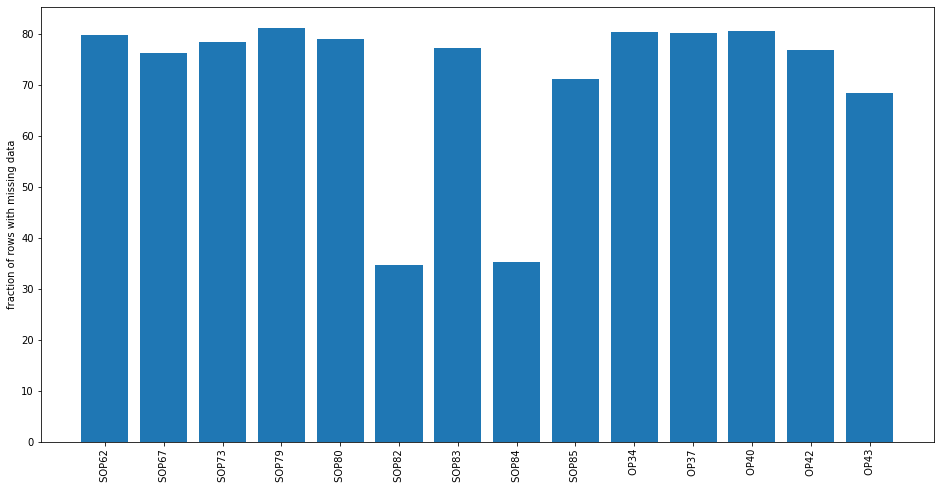

In [5]:
null_counts = df.isnull().sum()[1:]/len(df[1:])*100
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
df.isnull().sum()[1:]

 SOP62    1045
 SOP67     997
 SOP73    1027
 SOP79    1063
 SOP80    1034
 SOP82     454
 SOP83    1012
 SOP84     462
 SOP85     931
 OP34     1053
 OP37     1049
 OP40     1054
 OP42     1007
 OP43      895
dtype: int64

In [ ]:
d1={'Patient Ids':df.columns[1:],'Null_counts':df.isnull().sum()[1:]}
df_n=pd.DataFrame(d1)
df_n

,Patient Ids,Null_counts
SOP62,SOP62,1045
SOP67,SOP67,997
SOP73,SOP73,1027
SOP79,SOP79,1063
SOP80,SOP80,1034
SOP82,SOP82,454
SOP83,SOP83,1012
SOP84,SOP84,462
SOP85,SOP85,931
OP34,OP34,1053


In [9]:
len(df[1:].T)

15

In [10]:
d={'Proteins':df['Protein IDs'],'Null_counts':df.isnull().sum(axis=1),"percentage":(df.isnull().sum(axis=1)/14)*100}
df_null = pd.DataFrame(d)
df_null[1:]

,Proteins,Null_counts,percentage
1,P62851,12,85.714286
2,P22392,13,92.857143
3,O60869,14,100.000000
4,Q9H0K6,5,35.714286
5,Q14974,11,78.571429
...,...,...,...
1304,Q92752,10,71.428571
1305,Q99798,9,64.285714
1306,Q9BUF5,7,50.000000
1307,Q9BVA1,8,57.142857


In [11]:
df_null[1:].to_csv("/content/gdrive/My Drive/protein_wise_severe_nullcounts.csv")

In [ ]:
df_null.max()

Null_counts    14
dtype: int64

In [ ]:
df_null[df_null['Null_counts']==14]

,Proteins,Null_counts
3,O60869,14
9,Q86X29,14
10,Q5SYC1,14
11,Q86Y82,14
12,Q9Y3U8,14
...,...,...
984,P02730,14
1020,P23368,14
1061,P20160,14
1067,P52566,14


In [ ]:
df_t=df.T
df_t

,0,1,2,3,4,5,6,7,8,9,...,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Protein IDs,NaN,P62851,P22392,O60869,Q9H0K6,Q14974,Q96RW7,P47897,O95399,Q86X29,...,Q16555,Q16658,Q5VTE0,Q6W4X9,Q71U36,Q92752,Q99798,Q9BUF5,Q9BVA1,Q9P2E9
SOP62,Severe,NaN,NaN,NaN,31293000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOP67,Severe,NaN,NaN,NaN,5962900,NaN,15049000,NaN,NaN,NaN,...,78677,NaN,NaN,2251700,93420,NaN,NaN,10182000,NaN,NaN
SOP73,Severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1384200,1669500,NaN,NaN,NaN,NaN
SOP79,Severe,NaN,NaN,NaN,28968000,NaN,13111000,NaN,NaN,NaN,...,85336,NaN,NaN,NaN,36790,NaN,NaN,NaN,NaN,NaN
SOP80,Severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,204360,NaN,426820,NaN,NaN,22914000,NaN,NaN
SOP82,Severe,NaN,7417500,NaN,NaN,1347500,NaN,NaN,4795400,NaN,...,298250000,31455000,177450000,NaN,853740000,6870300,42094000,126670000,139790000,18938000
SOP83,Severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,361810,NaN,338130,NaN,NaN,1176500,NaN,NaN
SOP84,Severe,8428200,NaN,NaN,NaN,11196000,NaN,1256000,28462000,NaN,...,468520000,74479000,352060000,NaN,1968200000,42891000,137300000,466240000,382310000,21610000
SOP85,Severe,NaN,NaN,NaN,4827200,862580,NaN,NaN,NaN,NaN,...,NaN,NaN,20108000,NaN,14751000,NaN,268910,NaN,541620,NaN


In [ ]:
P_id=df['Protein IDs'].to_numpy()
T=df.index.to_numpy()
p=df_t[0].to_numpy()
I=df_t.index.to_numpy()
keys = I
vals = p
d2=dict(zip(keys, zip(vals)))
keys_p=P_id
vals_p=T
d3=dict(zip(keys_p,zip(vals_p)))


In [ ]:
def getprotein_col_index(ProteinIDs):
    protein_id_column_index=d3[ProteinIDs][0]
    return protein_id_column_index

In [ ]:
getprotein_col_index('P62851')
len(df_t.isnull()[1:])

14

In [ ]:
def getprotein_intensity(protein_id_column_index,patient_id):
    
    return df_t[protein_id_column_index][patient_id]   

In [ ]:
df_t.isnull()[2]

Protein IDs    False
 SOP62          True
 SOP67          True
 SOP73          True
 SOP79          True
 SOP80          True
 SOP82         False
 SOP83          True
 SOP84          True
 SOP85          True
 OP34           True
 OP37           True
 OP40           True
 OP42           True
 OP43           True
Name: 2, dtype: bool

In [ ]:
def get_severepatient_ids_intensity(protein_col_index):
    severe={}
    true_values=[]
    false_values=[]
    k=df_t.isnull()[protein_col_index].to_numpy()
    for i in range(1,14):
        if(k[i]==True):
            true_values.append(df_t.isnull()[protein_col_index].index[i])
        elif(k[i]==False):
            false_values.append(df_t.isnull()[protein_col_index].index[i])
    for j in range(0,len(false_values)):

        patientid=false_values[j]
        if(d2[patientid][0]=='Severe'):
            intensity=getprotein_intensity(protein_col_index,patientid)
            severe[patientid]=intensity
    return severe

In [ ]:
def check_no_of_severe(protein_id):
    severe=[]
    protein_col_index=getprotein_col_index(protein_id)
    true_values=[]
    k=df_t.isnull()[protein_col_index].to_numpy()
    for i in range(1,14):
        if(k[i]==True):
            true_values.append(df_t.isnull()[protein_col_index].index[i])
    for j in range(0,len(true_values)):

        patientid=true_values[j]
        if(d2[patientid][0]=='Severe'):
              severe.append(patientid)
    return int(len(severe))


In [ ]:
def null_data_frame_severe(protein_id):

    protein_col_index=getprotein_col_index(protein_id)
    severe_patients=get_severepatient_ids_intensity(protein_col_index)
    severe_patients_list=list(severe_patients.items())
    df_severe=pd.DataFrame(severe_patients_list)
    df_severe.columns=['severe_patient_ids','Protein Intensity_s']
    df_severe.index=[protein_id]*len(df_severe['severe_patient_ids'])
    return df_severe

In [ ]:
null_data_frame_severe('Q9H0K6')

,severe_patient_ids,Protein Intensity_s
Q9H0K6,SOP62,31293000
Q9H0K6,SOP67,5962900
Q9H0K6,SOP79,28968000
Q9H0K6,SOP85,4827200
Q9H0K6,OP34,2757000
Q9H0K6,OP37,6877600
Q9H0K6,OP40,3570500
Q9H0K6,OP42,2625500


In [ ]:
def no_of_severe_count(protein_id):
    d_missingnumbers=[]
    d_missingnumbers=[int(check_no_of_severe(protein_id))]
    return d_missingnumbers

In [ ]:
no_of_severe_count('Q9H0K6')

[5]

In [ ]:
Protein_id=[]
no_of_severe=[]
for i in df_null[df_null['Null_counts']>=5]['Proteins']:
  
    Protein_id.append(i)
    no_of_severe.append(int(no_of_severe_count(i)[0]))
array=np.array([Protein_id,no_of_severe])
df_missingvalues=pd.DataFrame(array)
df_missingvalues_t=df_missingvalues.T
df_missingvalues_t.columns=['Protein_id','no_of_severe']
df_missingvalues_t

,Protein_id,no_of_severe
0,P62851,12
1,P22392,12
2,O60869,13
3,Q9H0K6,5
4,Q14974,10
...,...,...
1105,Q92752,9
1106,Q99798,9
1107,Q9BUF5,6
1108,Q9BVA1,8


In [ ]:
Proteins_to_remove=df_missingvalues_t[(df_missingvalues_t['no_of_severe'].astype(int) >= 5)]["Protein_id"].to_numpy()

In [ ]:
len(Proteins_to_remove)

1105

In [ ]:
ins=[]
for i in range(len(Proteins_to_remove)):
    ins.append(getprotein_col_index(Proteins_to_remove[i]))
ins


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,


In [ ]:
for i in range(0,len(Proteins_to_remove)):
    index_to_remove=getprotein_col_index(Proteins_to_remove[i])
    df.drop(index_to_remove,axis=0,inplace=True)

In [ ]:
df

,Protein IDs,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
0,NaN,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe,Severe
20,Q9NYW8,10803000,130670000,NaN,101100000,NaN,100530000,NaN,87820000,166070000,9823600,20407000,NaN,18183000,16627000
28,P59594,NaN,11676000,10370000,NaN,4516900,7222400,12005000,12170000,9797400,NaN,8502900,6805800,7350000,NaN
87,A0A0C4DH42,10829000,4321400,2847100,NaN,1006100,2840200,1906800,2048000,1527800,NaN,NaN,2374100,NaN,NaN
98,O75150,120620000,68555000,77024000,42202000,57151000,107370000,72950000,302130000,NaN,77244000,28153000,NaN,72917000,66569000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,P80748,214190000,93713000,105130000,36518000,32754000,114380000,119630000,149150000,46682000,8803100,40494000,122560000,56622000,19220000
1294,Q02383,NaN,29327,20873000,93640,5774.3,NaN,374690000,16705,743020,759610,9898.9,1564300,7241.3,14960
1296,Q03591,17859000,53455000,35840000,23634000,20664000,13889000,20914000,44048000,14975000,13210000,30294000,9273800,10230000,9972600
1298,Q14624,216170000,175120000,86596000,89621000,71157000,83714000,103640000,150430000,110600000,47155000,108400000,89444000,66684000,65698000


In [ ]:
#df.to_csv(r'E:/3rd sem project/modified dataset_new_severe_30%.csv')

In [ ]:
new_df=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/severe/modified dataset_new_severe_30%.csv')
new_df=new_df.set_index('Protein IDs')
new_df

,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
Protein IDs,,,,,,,,,,,,,,
Q9NYW8,10803000.0,130670000.0,NaN,101100000.0,NaN,100530000.0,NaN,8.782000e+07,166070000.0,9823600.0,20407000.0,NaN,18183000.0,16627000.0
P59594,NaN,11676000.0,10370000.0,NaN,4516900.0,7222400.0,12005000.0,1.217000e+07,9797400.0,NaN,8502900.0,6805800.0,7350000.0,NaN
A0A0C4DH42,10829000.0,4321400.0,2847100.0,NaN,1006100.0,2840200.0,1906800.0,2.048000e+06,1527800.0,NaN,NaN,2374100.0,NaN,NaN
O75150,120620000.0,68555000.0,77024000.0,42202000.0,57151000.0,107370000.0,72950000.0,3.021300e+08,NaN,77244000.0,28153000.0,NaN,72917000.0,66569000.0
Q16762,44581000.0,8883600.0,41532000.0,68825000.0,NaN,18126000.0,50697000.0,6.403000e+07,49731000.0,13911000.0,30119000.0,54307000.0,30776000.0,20520000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,214190000.0,93713000.0,105130000.0,36518000.0,32754000.0,114380000.0,119630000.0,1.491500e+08,46682000.0,8803100.0,40494000.0,122560000.0,56622000.0,19220000.0
Q02383,NaN,29327.0,20873000.0,93640.0,5774.3,NaN,374690000.0,1.670500e+04,743020.0,759610.0,9898.9,1564300.0,7241.3,14960.0
Q03591,17859000.0,53455000.0,35840000.0,23634000.0,20664000.0,13889000.0,20914000.0,4.404800e+07,14975000.0,13210000.0,30294000.0,9273800.0,10230000.0,9972600.0


In [ ]:
df_trans= new_df.T
df_trans

Protein IDs,Q9NYW8,P59594,A0A0C4DH42,O75150,Q16762,Q8N1C3,P00742,P55884,A0A0B4J1U7,Q96SN8,...,P63104,P63261,P67936,P68871,P69905,P80748,Q02383,Q03591,Q14624,Q71U36
SOP62,10803000.0,NaN,10829000.0,120620000.0,44581000.0,98207000.0,12253000.0,NaN,30453000.0,38621000.0,...,2605000.0,3.949200e+07,175250.0,9.056300e+08,789310000.0,214190000.0,NaN,17859000.0,216170000.0,NaN
SOP67,130670000.0,11676000.0,4321400.0,68555000.0,8883600.0,24706000.0,15917000.0,7765300.0,28197000.0,47921000.0,...,859990.0,5.109100e+07,965350.0,2.952000e+08,276350000.0,93713000.0,29327.0,53455000.0,175120000.0,9.342000e+04
SOP73,NaN,10370000.0,2847100.0,77024000.0,41532000.0,17762000.0,NaN,NaN,11691000.0,14860000.0,...,9006700.0,9.999600e+07,24106000.0,2.337200e+08,297320000.0,105130000.0,20873000.0,35840000.0,86596000.0,1.384200e+06
SOP79,101100000.0,NaN,NaN,42202000.0,68825000.0,19416000.0,NaN,5245500.0,11608000.0,27294000.0,...,NaN,2.116800e+07,318450.0,2.607200e+08,144910000.0,36518000.0,93640.0,23634000.0,89621000.0,3.679000e+04
SOP80,NaN,4516900.0,1006100.0,57151000.0,NaN,2855600.0,8761900.0,4595000.0,17099000.0,25219000.0,...,423240.0,3.606300e+07,458510.0,3.484100e+08,283500000.0,32754000.0,5774.3,20664000.0,71157000.0,4.268200e+05
SOP82,100530000.0,7222400.0,2840200.0,107370000.0,18126000.0,8695500.0,8143000.0,4791100.0,6423800.0,4420500.0,...,97589000.0,9.417100e+08,93125000.0,4.745000e+08,556850000.0,114380000.0,NaN,13889000.0,83714000.0,8.537400e+08
SOP83,NaN,12005000.0,1906800.0,72950000.0,50697000.0,21730000.0,6756800.0,3422600.0,14230000.0,18002000.0,...,1690800.0,5.357500e+07,2159400.0,4.726800e+08,544030000.0,119630000.0,374690000.0,20914000.0,103640000.0,3.381300e+05
SOP84,87820000.0,12170000.0,2048000.0,302130000.0,64030000.0,17889000.0,7231900.0,4855900.0,45569000.0,9480900.0,...,195930000.0,2.816500e+09,153140000.0,7.626200e+08,593430000.0,149150000.0,16705.0,44048000.0,150430000.0,1.968200e+09
SOP85,166070000.0,9797400.0,1527800.0,NaN,49731000.0,10468000.0,9923500.0,NaN,26956000.0,13760000.0,...,1649800.0,6.718900e+08,67175000.0,2.124100e+08,188010000.0,46682000.0,743020.0,14975000.0,110600000.0,1.475100e+07
OP34,9823600.0,NaN,NaN,77244000.0,13911000.0,3626700.0,4176000.0,13144000.0,4863200.0,10436000.0,...,NaN,3.567500e+07,654470.0,1.034700e+08,56056000.0,8803100.0,759610.0,13210000.0,47155000.0,2.243300e+05


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_trans),columns = df_trans.columns)
df_knn

Protein IDs,Q9NYW8,P59594,A0A0C4DH42,O75150,Q16762,Q8N1C3,P00742,P55884,A0A0B4J1U7,Q96SN8,...,P63104,P63261,P67936,P68871,P69905,P80748,Q02383,Q03591,Q14624,Q71U36
0,10803000.0,9706060.0,10829000.0,120620000.0,44581000.0,98207000.0,12253000.0,5085980.0,30453000.0,38621000.0,...,2605000.0,3.949200e+07,175250.0,9.056300e+08,789310000.0,214190000.0,4.333565e+06,17859000.0,216170000.0,3.969711e+08
1,130670000.0,11676000.0,4321400.0,68555000.0,8883600.0,24706000.0,15917000.0,7765300.0,28197000.0,47921000.0,...,859990.0,5.109100e+07,965350.0,2.952000e+08,276350000.0,93713000.0,2.932700e+04,53455000.0,175120000.0,9.342000e+04
2,94740600.0,10370000.0,2847100.0,77024000.0,41532000.0,17762000.0,7864660.0,7166840.0,11691000.0,14860000.0,...,9006700.0,9.999600e+07,24106000.0,2.337200e+08,297320000.0,105130000.0,2.087300e+07,35840000.0,86596000.0,1.384200e+06
3,101100000.0,8050220.0,2299200.0,42202000.0,68825000.0,19416000.0,5928380.0,5245500.0,11608000.0,27294000.0,...,23644028.0,2.116800e+07,318450.0,2.607200e+08,144910000.0,36518000.0,9.364000e+04,23634000.0,89621000.0,3.679000e+04
4,94740600.0,4516900.0,1006100.0,57151000.0,52059400.0,2855600.0,8761900.0,4595000.0,17099000.0,25219000.0,...,423240.0,3.606300e+07,458510.0,3.484100e+08,283500000.0,32754000.0,5.774300e+03,20664000.0,71157000.0,4.268200e+05
5,100530000.0,7222400.0,2840200.0,107370000.0,18126000.0,8695500.0,8143000.0,4791100.0,6423800.0,4420500.0,...,97589000.0,9.417100e+08,93125000.0,4.745000e+08,556850000.0,114380000.0,4.509616e+06,13889000.0,83714000.0,8.537400e+08
6,81258000.0,12005000.0,1906800.0,72950000.0,50697000.0,21730000.0,6756800.0,3422600.0,14230000.0,18002000.0,...,1690800.0,5.357500e+07,2159400.0,4.726800e+08,544030000.0,119630000.0,3.746900e+08,20914000.0,103640000.0,3.381300e+05
7,87820000.0,12170000.0,2048000.0,302130000.0,64030000.0,17889000.0,7231900.0,4855900.0,45569000.0,9480900.0,...,195930000.0,2.816500e+09,153140000.0,7.626200e+08,593430000.0,149150000.0,1.670500e+04,44048000.0,150430000.0,1.968200e+09
8,166070000.0,9797400.0,1527800.0,71339400.0,49731000.0,10468000.0,9923500.0,7166840.0,26956000.0,13760000.0,...,1649800.0,6.718900e+08,67175000.0,2.124100e+08,188010000.0,46682000.0,7.430200e+05,14975000.0,110600000.0,1.475100e+07
9,9823600.0,8050220.0,2299200.0,77244000.0,13911000.0,3626700.0,4176000.0,13144000.0,4863200.0,10436000.0,...,23644028.0,3.567500e+07,654470.0,1.034700e+08,56056000.0,8803100.0,7.596100e+05,13210000.0,47155000.0,2.243300e+05


In [ ]:
new_df_knn=df_knn.T
new_df_knn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Protein IDs,,,,,,,,,,,,,,
Q9NYW8,1.080300e+07,130670000.0,94740600.0,101100000.0,94740600.0,1.005300e+08,81258000.0,8.782000e+07,166070000.0,9823600.0,20407000.0,51369400.0,18183000.0,16627000.0
P59594,9.706060e+06,11676000.0,10370000.0,8050220.0,4516900.0,7.222400e+06,12005000.0,1.217000e+07,9797400.0,8050220.0,8502900.0,6805800.0,7350000.0,8377220.0
A0A0C4DH42,1.082900e+07,4321400.0,2847100.0,2299200.0,1006100.0,2.840200e+06,1906800.0,2.048000e+06,1527800.0,2299200.0,2299200.0,2374100.0,2299200.0,2299200.0
O75150,1.206200e+08,68555000.0,77024000.0,42202000.0,57151000.0,1.073700e+08,72950000.0,3.021300e+08,71339400.0,77244000.0,28153000.0,63442200.0,72917000.0,66569000.0
Q16762,4.458100e+07,8883600.0,41532000.0,68825000.0,52059400.0,1.812600e+07,50697000.0,6.403000e+07,49731000.0,13911000.0,30119000.0,54307000.0,30776000.0,20520000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,2.141900e+08,93713000.0,105130000.0,36518000.0,32754000.0,1.143800e+08,119630000.0,1.491500e+08,46682000.0,8803100.0,40494000.0,122560000.0,56622000.0,19220000.0
Q02383,4.333565e+06,29327.0,20873000.0,93640.0,5774.3,4.509616e+06,374690000.0,1.670500e+04,743020.0,759610.0,9898.9,1564300.0,7241.3,14960.0
Q03591,1.785900e+07,53455000.0,35840000.0,23634000.0,20664000.0,1.388900e+07,20914000.0,4.404800e+07,14975000.0,13210000.0,30294000.0,9273800.0,10230000.0,9972600.0


In [ ]:
# new_df_knn.to_csv(r'E:/3rd sem project/severe_modified_dataset_new_knn_30%.csv')

In [ ]:
new_df_1=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/severe/modified dataset_new_severe_30%.csv')
new_df_1=new_df_1.set_index('Protein IDs')
new_df_1

,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
Protein IDs,,,,,,,,,,,,,,
Q9NYW8,10803000.0,130670000.0,NaN,101100000.0,NaN,100530000.0,NaN,8.782000e+07,166070000.0,9823600.0,20407000.0,NaN,18183000.0,16627000.0
P59594,NaN,11676000.0,10370000.0,NaN,4516900.0,7222400.0,12005000.0,1.217000e+07,9797400.0,NaN,8502900.0,6805800.0,7350000.0,NaN
A0A0C4DH42,10829000.0,4321400.0,2847100.0,NaN,1006100.0,2840200.0,1906800.0,2.048000e+06,1527800.0,NaN,NaN,2374100.0,NaN,NaN
O75150,120620000.0,68555000.0,77024000.0,42202000.0,57151000.0,107370000.0,72950000.0,3.021300e+08,NaN,77244000.0,28153000.0,NaN,72917000.0,66569000.0
Q16762,44581000.0,8883600.0,41532000.0,68825000.0,NaN,18126000.0,50697000.0,6.403000e+07,49731000.0,13911000.0,30119000.0,54307000.0,30776000.0,20520000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,214190000.0,93713000.0,105130000.0,36518000.0,32754000.0,114380000.0,119630000.0,1.491500e+08,46682000.0,8803100.0,40494000.0,122560000.0,56622000.0,19220000.0
Q02383,NaN,29327.0,20873000.0,93640.0,5774.3,NaN,374690000.0,1.670500e+04,743020.0,759610.0,9898.9,1564300.0,7241.3,14960.0
Q03591,17859000.0,53455000.0,35840000.0,23634000.0,20664000.0,13889000.0,20914000.0,4.404800e+07,14975000.0,13210000.0,30294000.0,9273800.0,10230000.0,9972600.0


In [ ]:
df_trans_1= new_df_1.T

In [ ]:
# Missing Value Median-Imputation :-
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df_trans_1)
dfmedianimp = imp.transform(df_trans_1)

In [ ]:
dfmedianimp = pd.DataFrame(dfmedianimp)
dfmedianimp

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,10803000.0,9150150.0,10829000.0,120620000.0,44581000.0,98207000.0,12253000.0,7765300.0,30453000.0,38621000.0,...,2605000.0,3.949200e+07,175250.0,9.056300e+08,789310000.0,214190000.0,61483.5,17859000.0,216170000.0,1.384200e+06
1,130670000.0,11676000.0,4321400.0,68555000.0,8883600.0,24706000.0,15917000.0,7765300.0,28197000.0,47921000.0,...,859990.0,5.109100e+07,965350.0,2.952000e+08,276350000.0,93713000.0,29327.0,53455000.0,175120000.0,9.342000e+04
2,54113500.0,10370000.0,2847100.0,77024000.0,41532000.0,17762000.0,7231900.0,7765300.0,11691000.0,14860000.0,...,9006700.0,9.999600e+07,24106000.0,2.337200e+08,297320000.0,105130000.0,20873000.0,35840000.0,86596000.0,1.384200e+06
3,101100000.0,9150150.0,2374100.0,42202000.0,68825000.0,19416000.0,7231900.0,5245500.0,11608000.0,27294000.0,...,2586950.0,2.116800e+07,318450.0,2.607200e+08,144910000.0,36518000.0,93640.0,23634000.0,89621000.0,3.679000e+04
4,54113500.0,4516900.0,1006100.0,57151000.0,41532000.0,2855600.0,8761900.0,4595000.0,17099000.0,25219000.0,...,423240.0,3.606300e+07,458510.0,3.484100e+08,283500000.0,32754000.0,5774.3,20664000.0,71157000.0,4.268200e+05
5,100530000.0,7222400.0,2840200.0,107370000.0,18126000.0,8695500.0,8143000.0,4791100.0,6423800.0,4420500.0,...,97589000.0,9.417100e+08,93125000.0,4.745000e+08,556850000.0,114380000.0,61483.5,13889000.0,83714000.0,8.537400e+08
6,54113500.0,12005000.0,1906800.0,72950000.0,50697000.0,21730000.0,6756800.0,3422600.0,14230000.0,18002000.0,...,1690800.0,5.357500e+07,2159400.0,4.726800e+08,544030000.0,119630000.0,374690000.0,20914000.0,103640000.0,3.381300e+05
7,87820000.0,12170000.0,2048000.0,302130000.0,64030000.0,17889000.0,7231900.0,4855900.0,45569000.0,9480900.0,...,195930000.0,2.816500e+09,153140000.0,7.626200e+08,593430000.0,149150000.0,16705.0,44048000.0,150430000.0,1.968200e+09
8,166070000.0,9797400.0,1527800.0,72933500.0,49731000.0,10468000.0,9923500.0,7765300.0,26956000.0,13760000.0,...,1649800.0,6.718900e+08,67175000.0,2.124100e+08,188010000.0,46682000.0,743020.0,14975000.0,110600000.0,1.475100e+07
9,9823600.0,9150150.0,2374100.0,77244000.0,13911000.0,3626700.0,4176000.0,13144000.0,4863200.0,10436000.0,...,2586950.0,3.567500e+07,654470.0,1.034700e+08,56056000.0,8803100.0,759610.0,13210000.0,47155000.0,2.243300e+05


In [ ]:
df_median_imp=dfmedianimp.T
df_median_imp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,10803000.0,130670000.0,54113500.0,101100000.0,54113500.0,100530000.0,54113500.0,8.782000e+07,166070000.0,9823600.0,20407000.0,54113500.0,18183000.0,16627000.0
1,9150150.0,11676000.0,10370000.0,9150150.0,4516900.0,7222400.0,12005000.0,1.217000e+07,9797400.0,9150150.0,8502900.0,6805800.0,7350000.0,9150150.0
2,10829000.0,4321400.0,2847100.0,2374100.0,1006100.0,2840200.0,1906800.0,2.048000e+06,1527800.0,2374100.0,2374100.0,2374100.0,2374100.0,2374100.0
3,120620000.0,68555000.0,77024000.0,42202000.0,57151000.0,107370000.0,72950000.0,3.021300e+08,72933500.0,77244000.0,28153000.0,72933500.0,72917000.0,66569000.0
4,44581000.0,8883600.0,41532000.0,68825000.0,41532000.0,18126000.0,50697000.0,6.403000e+07,49731000.0,13911000.0,30119000.0,54307000.0,30776000.0,20520000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,214190000.0,93713000.0,105130000.0,36518000.0,32754000.0,114380000.0,119630000.0,1.491500e+08,46682000.0,8803100.0,40494000.0,122560000.0,56622000.0,19220000.0
199,61483.5,29327.0,20873000.0,93640.0,5774.3,61483.5,374690000.0,1.670500e+04,743020.0,759610.0,9898.9,1564300.0,7241.3,14960.0
200,17859000.0,53455000.0,35840000.0,23634000.0,20664000.0,13889000.0,20914000.0,4.404800e+07,14975000.0,13210000.0,30294000.0,9273800.0,10230000.0,9972600.0
201,216170000.0,175120000.0,86596000.0,89621000.0,71157000.0,83714000.0,103640000.0,1.504300e+08,110600000.0,47155000.0,108400000.0,89444000.0,66684000.0,65698000.0


In [ ]:
# df_median_imp.to_csv(r'E:/3rd sem project/severe_median_modified_dataset_new_30%.csv')

## Normalization

In [ ]:
df_knn=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/severe/severe_modified_dataset_new_knn_30%.csv')
df_knn

,Protein IDs,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
0,Q9NYW8,1.080300e+07,130670000,94740600.0,101100000.0,94740600.0,1.005300e+08,81258000,87820000,166070000,9823600,20407000.0,51369400.0,18183000.0,16627000
1,P59594,9.706060e+06,11676000,10370000.0,8050220.0,4516900.0,7.222400e+06,12005000,12170000,9797400,8050220,8502900.0,6805800.0,7350000.0,8377220
2,A0A0C4DH42,1.082900e+07,4321400,2847100.0,2299200.0,1006100.0,2.840200e+06,1906800,2048000,1527800,2299200,2299200.0,2374100.0,2299200.0,2299200
3,O75150,1.206200e+08,68555000,77024000.0,42202000.0,57151000.0,1.073700e+08,72950000,302130000,71339400,77244000,28153000.0,63442200.0,72917000.0,66569000
4,Q16762,4.458100e+07,8883600,41532000.0,68825000.0,52059400.0,1.812600e+07,50697000,64030000,49731000,13911000,30119000.0,54307000.0,30776000.0,20520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,P80748,2.141900e+08,93713000,105130000.0,36518000.0,32754000.0,1.143800e+08,119630000,149150000,46682000,8803100,40494000.0,122560000.0,56622000.0,19220000
199,Q02383,4.333565e+06,29327,20873000.0,93640.0,5774.3,4.509616e+06,374690000,16705,743020,759610,9898.9,1564300.0,7241.3,14960
200,Q03591,1.785900e+07,53455000,35840000.0,23634000.0,20664000.0,1.388900e+07,20914000,44048000,14975000,13210000,30294000.0,9273800.0,10230000.0,9972600
201,Q14624,2.161700e+08,175120000,86596000.0,89621000.0,71157000.0,8.371400e+07,103640000,150430000,110600000,47155000,108400000.0,89444000.0,66684000.0,65698000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
arr = np.array(df_knn)
arr

array([['Q9NYW8', 10803000.0, 130670000, ..., 51369400.0, 18183000.0,
        16627000],
       ['P59594', 9706060.0, 11676000, ..., 6805800.0, 7350000.0,
        8377220],
       ['A0A0C4DH42', 10829000.0, 4321400, ..., 2374100.0, 2299200.0,
        2299200],
       ...,
       ['Q03591', 17859000.0, 53455000, ..., 9273800.0, 10230000.0,
        9972600],
       ['Q14624', 216170000.0, 175120000, ..., 89444000.0, 66684000.0,
        65698000],
       ['Q71U36', 396971088.0, 93420, ..., 178388424.0, 23759000.0,
        14182000]], dtype=object)

In [ ]:
cols = list(df_knn.columns)
cols.remove('Protein IDs')
df_knn = df_knn[cols]

In [ ]:
df_knn

,SOP62,SOP67,SOP73,SOP79,SOP80,SOP82,SOP83,SOP84,SOP85,OP34,OP37,OP40,OP42,OP43
0,1.080300e+07,130670000,94740600.0,101100000.0,94740600.0,1.005300e+08,81258000,87820000,166070000,9823600,20407000.0,51369400.0,18183000.0,16627000
1,9.706060e+06,11676000,10370000.0,8050220.0,4516900.0,7.222400e+06,12005000,12170000,9797400,8050220,8502900.0,6805800.0,7350000.0,8377220
2,1.082900e+07,4321400,2847100.0,2299200.0,1006100.0,2.840200e+06,1906800,2048000,1527800,2299200,2299200.0,2374100.0,2299200.0,2299200
3,1.206200e+08,68555000,77024000.0,42202000.0,57151000.0,1.073700e+08,72950000,302130000,71339400,77244000,28153000.0,63442200.0,72917000.0,66569000
4,4.458100e+07,8883600,41532000.0,68825000.0,52059400.0,1.812600e+07,50697000,64030000,49731000,13911000,30119000.0,54307000.0,30776000.0,20520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2.141900e+08,93713000,105130000.0,36518000.0,32754000.0,1.143800e+08,119630000,149150000,46682000,8803100,40494000.0,122560000.0,56622000.0,19220000
199,4.333565e+06,29327,20873000.0,93640.0,5774.3,4.509616e+06,374690000,16705,743020,759610,9898.9,1564300.0,7241.3,14960
200,1.785900e+07,53455000,35840000.0,23634000.0,20664000.0,1.388900e+07,20914000,44048000,14975000,13210000,30294000.0,9273800.0,10230000.0,9972600
201,2.161700e+08,175120000,86596000.0,89621000.0,71157000.0,8.371400e+07,103640000,150430000,110600000,47155000,108400000.0,89444000.0,66684000.0,65698000


In [ ]:
scaler = MinMaxScaler()
# transform data
Min_Max_scaled = scaler.fit_transform(df_knn)
df_minmax = pd.DataFrame(Min_Max_scaled)
df_minmax

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000950,0.011572,0.016260,0.029816,0.014169,0.028487,0.012733,0.012110,0.027258,0.005710,0.007432,0.014289,0.006010,0.008678
1,0.000852,0.001032,0.001754,0.002364,0.000675,0.001696,0.001876,0.001676,0.001587,0.004667,0.003094,0.001881,0.002428,0.004368
2,0.000952,0.000380,0.000461,0.000667,0.000150,0.000438,0.000293,0.000280,0.000228,0.001285,0.000834,0.000647,0.000758,0.001193
3,0.010709,0.006070,0.013214,0.012440,0.008547,0.030451,0.011431,0.041669,0.011696,0.045358,0.010254,0.017650,0.024109,0.034767
4,0.003952,0.000784,0.007112,0.020294,0.007786,0.004827,0.007942,0.008829,0.008147,0.008113,0.010970,0.015107,0.010174,0.010712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.019025,0.008299,0.018046,0.010763,0.004898,0.032464,0.018749,0.020569,0.007646,0.005110,0.014751,0.034111,0.018721,0.010032
199,0.000375,0.000000,0.003560,0.000017,0.000000,0.000917,0.058736,0.000000,0.000100,0.000380,0.000000,0.000421,0.000000,0.000000
200,0.001577,0.004733,0.006133,0.006962,0.003090,0.003610,0.003273,0.006073,0.002437,0.007701,0.011034,0.002568,0.003380,0.005202
201,0.019201,0.015510,0.014860,0.026429,0.010642,0.023659,0.016242,0.020746,0.018146,0.027663,0.039492,0.024890,0.022048,0.034312


In [ ]:
df_minmax.to_csv(r'E:/3rd sem project/Min-Max_new_severe_knn_30%.csv')

In [ ]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
df_robust = trans.fit_transform(df_knn)
# convert the array back to a dataframe
df_robust = pd.DataFrame(df_robust)
df_robust

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.171599,0.540046,0.907189,1.534919,1.164792,0.758492,0.552658,0.254491,1.805519,0.016239,-0.030293,0.383783,0.066296,0.001269
1,-0.177884,-0.204903,-0.139762,-0.131054,-0.201410,-0.216585,-0.100435,-0.185339,-0.189991,-0.040615,-0.217626,-0.211898,-0.147132,-0.152221
2,-0.171451,-0.250945,-0.233114,-0.234021,-0.254572,-0.262380,-0.195667,-0.244189,-0.295589,-0.224988,-0.315253,-0.271137,-0.246641,-0.265304
3,0.457516,0.151182,0.687345,0.480403,0.595595,0.829971,0.474309,1.500494,0.595864,2.177682,0.091604,0.545161,1.144647,0.930453
4,0.021907,-0.222384,0.246926,0.957064,0.518496,-0.102641,0.264451,0.116176,0.319938,0.147277,0.122543,0.423050,0.314399,0.073699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.993557,0.308681,1.036111,0.378636,0.226167,0.903226,0.914527,0.611065,0.281004,-0.016478,0.285812,1.335388,0.823608,0.049512
199,-0.208661,-0.277815,-0.009431,-0.273510,-0.269720,-0.244934,3.319881,-0.255999,-0.305610,-0.274346,-0.351279,-0.281962,-0.291796,-0.307803
200,-0.131177,0.056650,0.176294,0.147960,0.043095,-0.146919,-0.016419,0.000000,-0.123876,0.124804,0.125297,-0.178909,-0.090391,-0.122538
201,1.004900,0.818320,0.806123,1.329398,0.807680,0.582762,0.763732,0.618507,1.097200,1.213053,1.354437,0.892727,1.021846,0.914248


In [ ]:
df_robust.to_csv(r'E:/3rd sem project/robust_new_severe_knn_30%.csv')

In [ ]:
scaler_1 = StandardScaler()
# transform data
Standard_scaled = scaler_1.fit_transform(df_knn)
df_standard_scaled = pd.DataFrame(Standard_scaled )
df_standard_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.304344,-0.205643,-0.170938,-0.081829,-0.162270,-0.175892,-0.176092,-0.261801,-0.072384,-0.284821,-0.321793,-0.222599,-0.267662,-0.286337
1,-0.305066,-0.297141,-0.292131,-0.303527,-0.273098,-0.359444,-0.270645,-0.337942,-0.280991,-0.294187,-0.356149,-0.323601,-0.295068,-0.320898
2,-0.304327,-0.302796,-0.302937,-0.317229,-0.277410,-0.368065,-0.284432,-0.348130,-0.292030,-0.324560,-0.374053,-0.333645,-0.307846,-0.346361
3,-0.232106,-0.253405,-0.196387,-0.222158,-0.208444,-0.162436,-0.187436,-0.046100,-0.198839,0.071249,-0.299438,-0.195236,-0.129190,-0.077113
4,-0.282125,-0.299288,-0.247369,-0.158726,-0.214698,-0.337995,-0.217818,-0.285745,-0.227684,-0.263234,-0.293764,-0.215941,-0.235803,-0.270028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-0.170554,-0.234060,-0.156014,-0.235700,-0.238412,-0.148646,-0.123702,-0.200073,-0.231754,-0.290211,-0.263821,-0.061247,-0.170415,-0.275474
199,-0.308600,-0.306096,-0.277044,-0.322484,-0.278639,-0.364781,0.224537,-0.350174,-0.293078,-0.332691,-0.380660,-0.335481,-0.313645,-0.355930
200,-0.299703,-0.265016,-0.255545,-0.266397,-0.253263,-0.346330,-0.258481,-0.305857,-0.274079,-0.266936,-0.293259,-0.318007,-0.287782,-0.314214
201,-0.169252,-0.171464,-0.182637,-0.109178,-0.191239,-0.208972,-0.145534,-0.198784,-0.146430,-0.087661,-0.067841,-0.136304,-0.144959,-0.080762


In [ ]:
df_standard_scaled.to_csv(r'E:/3rd sem project/Standardization_new_severe_knn_30%.csv')